# Ensemble MaBoSS simulations

In [1]:
import maboss
import time, biolqm, os

In [2]:
outputs = ['Apoptosis', 'CellCycleArrest', 'Invasion']

In [3]:
bnet_model = biolqm.load(os.path.join("Invasion", "Invasion_0.bnet"))
nodes = [node.getNodeID() for node in bnet_model.getComponents()]
istate = {node: (1, 0)  for node in nodes}
istate['DNAdamage'] = (0.5, 0.5)
istate['ECMicroenv'] = (0.5, 0.5)

## Simulating the ensemble, keeping individual results to be analyzed

In [4]:
t0 = time.time()

simulation = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=500000,
    thread_count=6,
    istate=istate,
    max_time=50, time_tick=1,
    outputs=outputs,
    individual_results=True,
    random_sampling=True
)

result = simulation.run()

print("Simulation executed in %.2fs" % (time.time() - t0))

Simulation executed in 40.42s


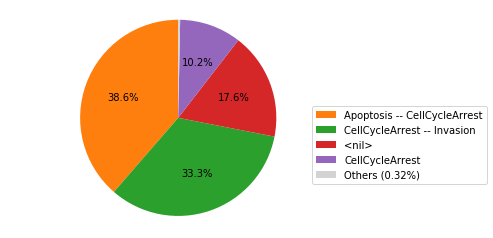

In [5]:
result.plot_piechart()

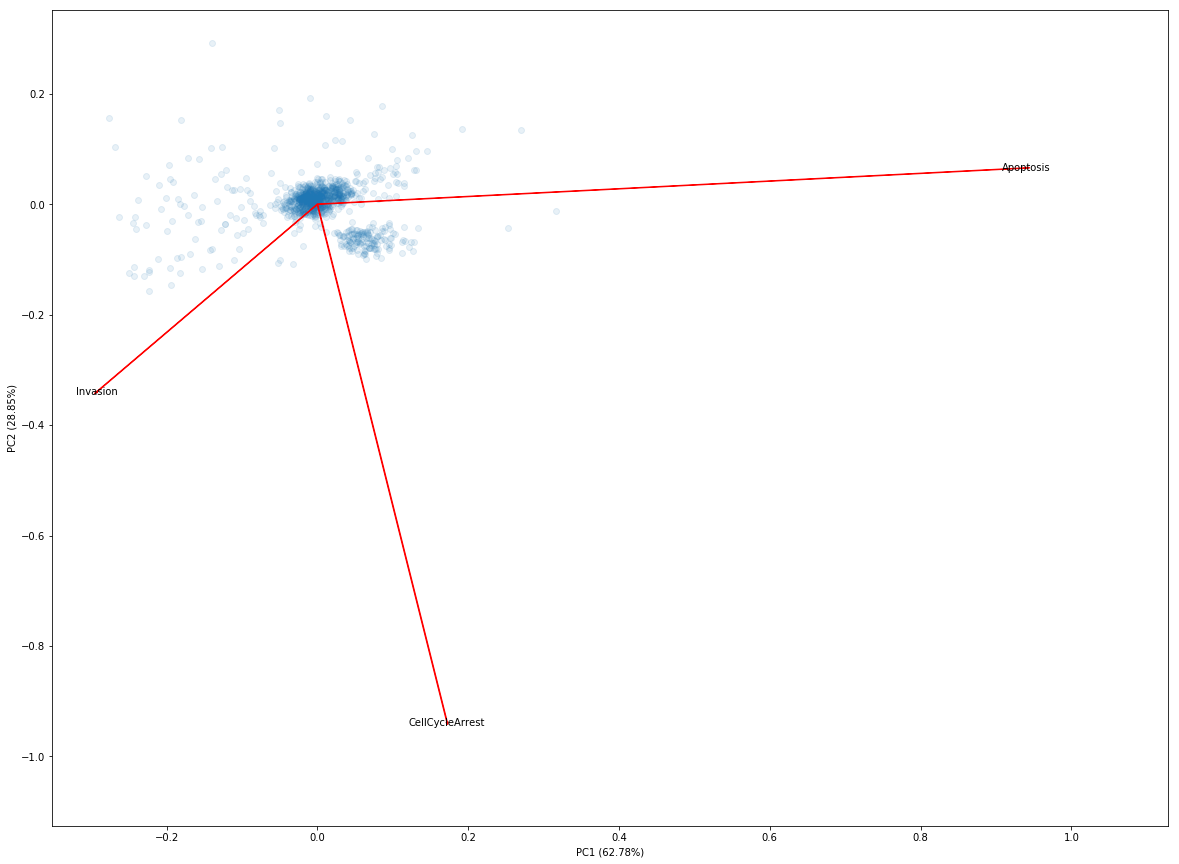

In [6]:
result.plotSteadyStatesNodesDistribution(figsize=(20, 15))

## Simulating the p53--, NICD++ mutant

In [7]:
mutations={'p53': 'OFF', 'NICD': 'ON'}

t0 = time.time()

simulation_mutant = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=500000,
    thread_count=6,
    max_time=50, time_tick=1,
    istate=istate,
    outputs=outputs,
    mutations=mutations,
    individual_results=True,
    random_sampling=True
)

result_mutant = simulation_mutant.run()

print("Simulation executed in %.2fs" % (time.time() - t0))

Simulation executed in 48.27s


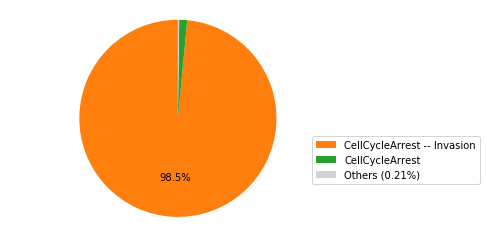

In [8]:
result_mutant.plot_piechart()

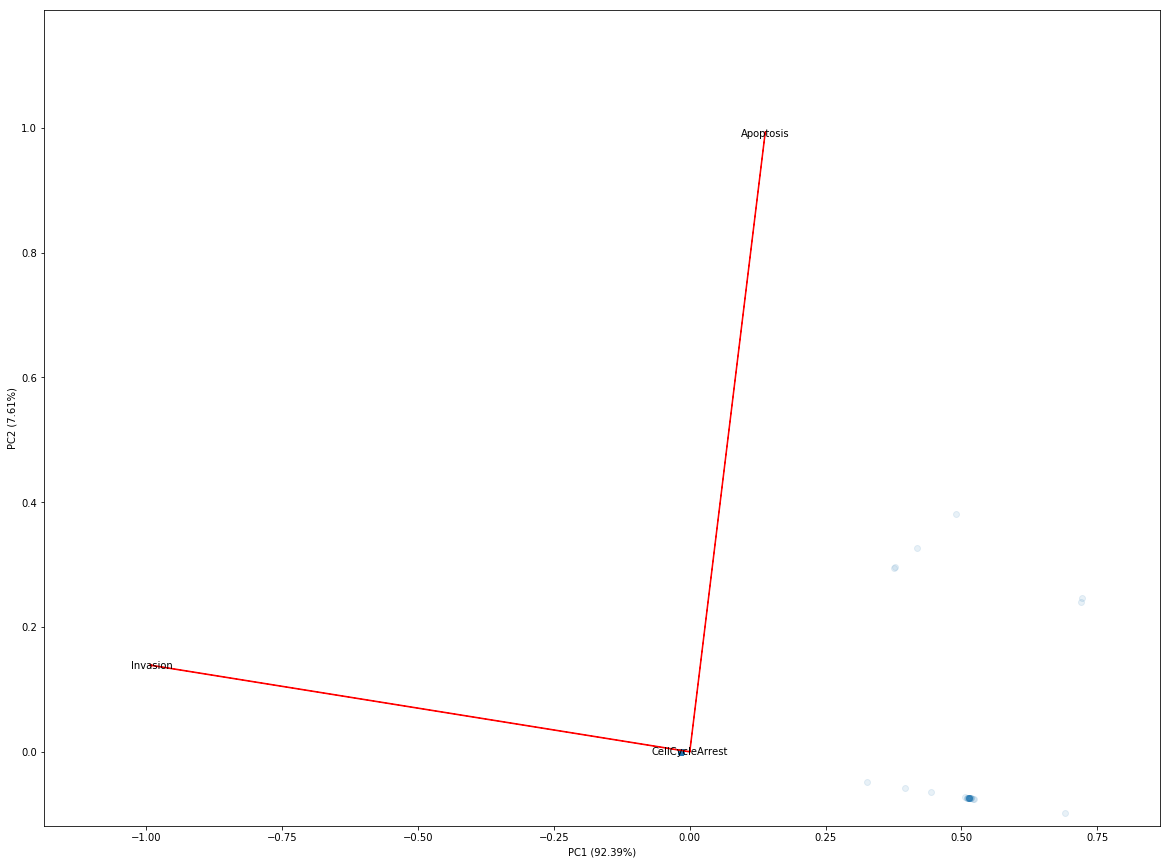

In [9]:
result_mutant.plotSteadyStatesNodesDistribution(figsize=(20, 15))

## Comparing the results

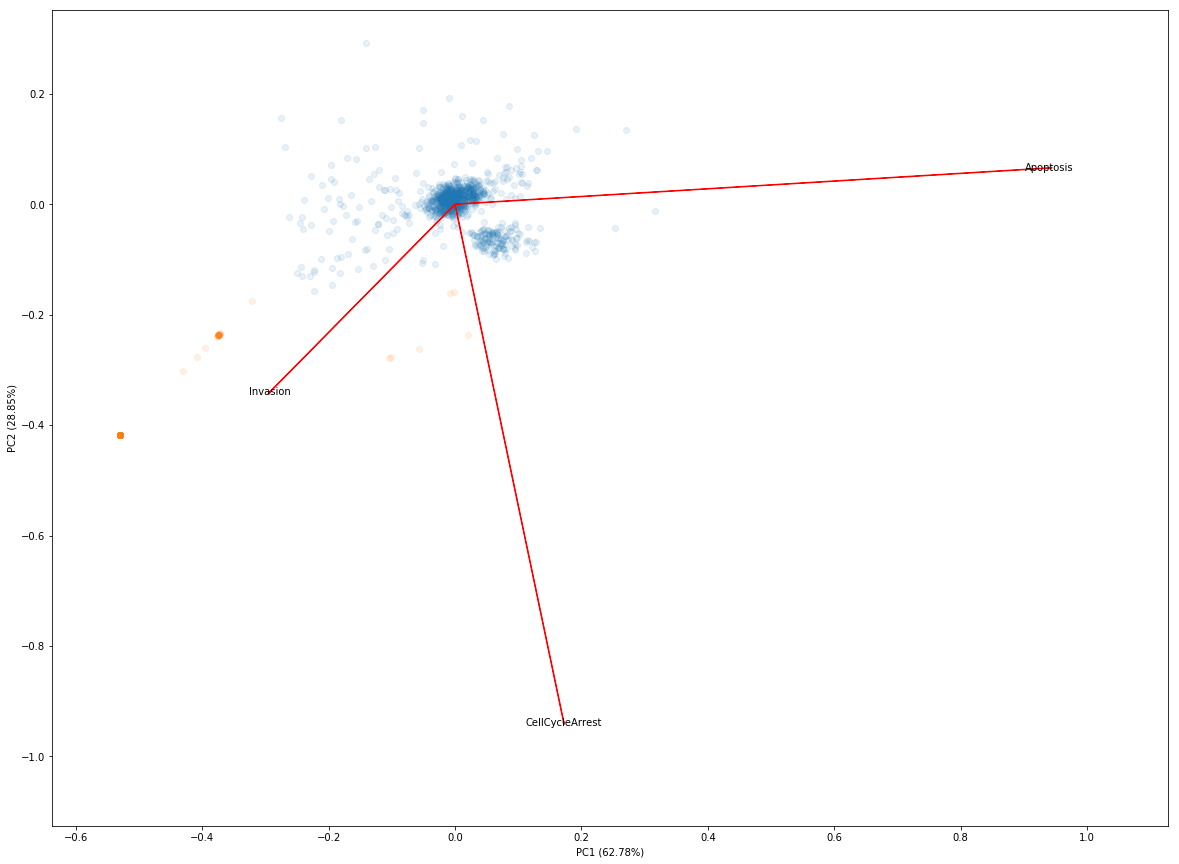

In [10]:
result.plotSteadyStatesNodesDistribution(figsize=(20, 15), compare=result_mutant)

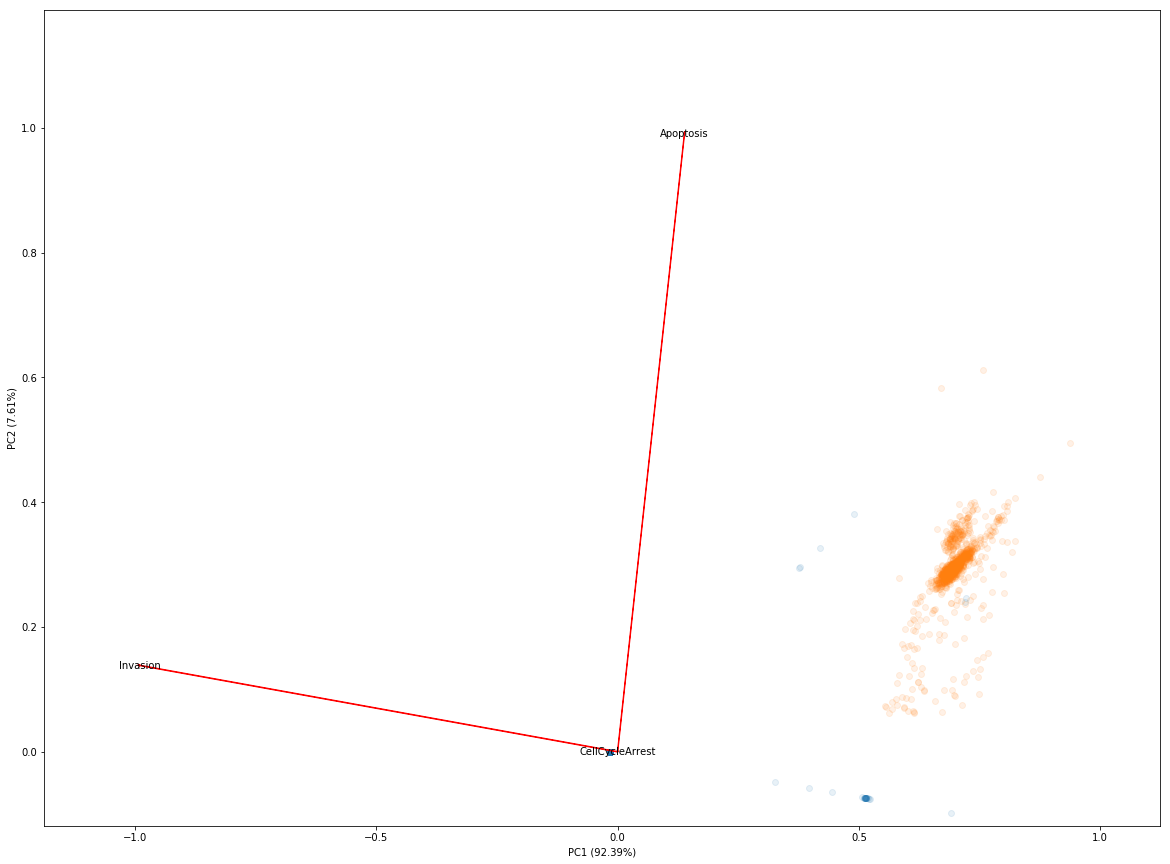

In [11]:
result_mutant.plotSteadyStatesNodesDistribution(figsize=(20, 15), compare=result)